[Problem 1] Sharing and executing the official tutorial model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# model architecture
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

C:\Users\o.oyuntuya\AppData\Local\anaconda3\envs\OnlineTraining\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# not trained model 
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.04287296, -0.13277252, -0.2962924 , -0.98477226, -0.821373  ,
         0.18173529,  0.08907125, -0.2500786 , -0.57735586, -0.32218835]],
      dtype=float32)

In [5]:
# softmax
tf.nn.softmax(predictions).numpy()

array([[0.1332484 , 0.11178415, 0.09492145, 0.04768275, 0.05614678,
        0.15309788, 0.13954866, 0.09941109, 0.07166384, 0.09249493]],
      dtype=float32)

In [6]:
# loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
# loss debug
loss_fn(y_train[:1], predictions).numpy()

1.8766778

In [8]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - accuracy: 0.8639 - loss: 0.4788
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9548 - loss: 0.1498
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9667 - loss: 0.1109
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9738 - loss: 0.0855
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9770 - loss: 0.0725
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.9788 - loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0567
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9818 - loss: 0.0529
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9839 - loss: 0.0481
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9854 - loss: 0.0425


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 963us/step - accuracy: 0.9794 - loss: 0.0741


[0.07412466406822205, 0.9793999791145325]

In [11]:
predictions = model(x_test[4:5]).numpy()
np.round(tf.nn.softmax(predictions).numpy().astype("float32"), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.975, 0.   , 0.   , 0.   , 0.   ,
        0.025]], dtype=float32)

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
np.round(probability_model(x_test[:5]).numpy(), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.975, 0.   , 0.   , 0.   , 0.   ,
        0.025]], dtype=float32)

[Problem 2] (Advance assignment) Execute various methods

[Problem 3] Learning Iris (binary classification) with Keras


In [14]:
df = pd.read_csv("import/iris.csv")

#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [15]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [16]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,451 (21.29 KB)

 Trainable params: 5,451 (21.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 2s - 398ms/step - accuracy: 0.7812 - loss: 0.5321 - val_accuracy: 1.0000 - val_loss: 0.1968
Epoch 2/20
4/4 - 0s - 11ms/step - accuracy: 0.9219 - loss: 0.2595 - val_accuracy: 1.0000 - val_loss: 0.0827
Epoch 3/20
4/4 - 0s - 12ms/step - accuracy: 0.9531 - loss: 0.1302 - val_accuracy: 1.0000 - val_loss: 0.0555
Epoch 4/20
4/4 - 0s - 10ms/step - accuracy: 0.9688 - loss: 0.0796 - val_accuracy: 0.9375 - val_loss: 0.0604
Epoch 5/20
4/4 - 0s - 12ms/step - accuracy: 0.9688 - loss: 0.0524 - val_accuracy: 0.9375 - val_loss: 0.0554
Epoch 6/20
4/4 - 0s - 11ms/step - accuracy: 1.0000 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0379
Epoch 7/20
4/4 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 8/20
4/4 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 9/20
4/4 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 10/20
4/4 - 0s - 11ms

In [24]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0006501288153231144
Train accuracy: 1.0


[Problem 4] Learn Iris (multi-level classification) with Keras

In [25]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("import/iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# One Hot encoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [26]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [27]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(n_input,)))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax')) 

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,653 (22.08 KB)

 Trainable params: 5,653 (22.08 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 1s - 245ms/step - accuracy: 0.6458 - loss: 0.8115 - val_accuracy: 0.7500 - val_loss: 0.4681
Epoch 2/20
5/5 - 0s - 9ms/step - accuracy: 0.8333 - loss: 0.3283 - val_accuracy: 0.7917 - val_loss: 0.3757
Epoch 3/20
5/5 - 0s - 9ms/step - accuracy: 0.9167 - loss: 0.2191 - val_accuracy: 0.7917 - val_loss: 0.3273
Epoch 4/20
5/5 - 0s - 9ms/step - accuracy: 0.9479 - loss: 0.1409 - val_accuracy: 0.7917 - val_loss: 0.3887
Epoch 5/20
5/5 - 0s - 9ms/step - accuracy: 0.9479 - loss: 0.1087 - val_accuracy: 0.8333 - val_loss: 0.3307
Epoch 6/20
5/5 - 0s - 9ms/step - accuracy: 0.9688 - loss: 0.0816 - val_accuracy: 0.8750 - val_loss: 0.3518
Epoch 7/20
5/5 - 0s - 9ms/step - accuracy: 0.9792 - loss: 0.0600 - val_accuracy: 0.8750 - val_loss: 0.3481
Epoch 8/20
5/5 - 0s - 9ms/step - accuracy: 0.9896 - loss: 0.0448 - val_accuracy: 0.9167 - val_loss: 0.2661
Epoch 9/20
5/5 - 0s - 9ms/step - accuracy: 0.9896 - loss: 0.0524 - val_accuracy: 0.9167 - val_loss: 0.3190
Epoch 10/20
5/5 - 0s - 9ms/step - a

In [32]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.014715868979692459
Train accuracy: 1.0
Test loss: 0.0072725387290120125
Test accuracy: 1.0


[Problem 5] Learning House Prices with Keras

In [33]:
df = pd.read_csv("import/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [34]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(n_input,)))  # Specify input shape as a tuple
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [38]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,553 (21.69 KB)

 Trainable params: 5,553 (21.69 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [40]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 1s - 17ms/step - loss: 1411.4581 - mse: 1411.4580 - val_loss: 10.2464 - val_mse: 10.2464
Epoch 2/20
47/47 - 0s - 2ms/step - loss: 9.7861 - mse: 9.7861 - val_loss: 4.2021 - val_mse: 4.2021
Epoch 3/20
47/47 - 0s - 2ms/step - loss: 5.0567 - mse: 5.0567 - val_loss: 2.6232 - val_mse: 2.6232
Epoch 4/20
47/47 - 0s - 2ms/step - loss: 3.4924 - mse: 3.4924 - val_loss: 3.0861 - val_mse: 3.0861
Epoch 5/20
47/47 - 0s - 2ms/step - loss: 2.9032 - mse: 2.9032 - val_loss: 7.9142 - val_mse: 7.9142
Epoch 6/20
47/47 - 0s - 2ms/step - loss: 2.5595 - mse: 2.5595 - val_loss: 2.0097 - val_mse: 2.0097
Epoch 7/20
47/47 - 0s - 2ms/step - loss: 2.2264 - mse: 2.2264 - val_loss: 1.6080 - val_mse: 1.6080
Epoch 8/20
47/47 - 0s - 2ms/step - loss: 1.8916 - mse: 1.8916 - val_loss: 1.3105 - val_mse: 1.3105
Epoch 9/20
47/47 - 0s - 2ms/step - loss: 1.8091 - mse: 1.8091 - val_loss: 1.4251 - val_mse: 1.4251
Epoch 10/20
47/47 - 0s - 2ms/step - loss: 1.6538 - mse: 1.6538 - val_loss: 1.4131 - val_mse: 1.4131


In [41]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 1.1838042736053467
Train mse: 1.1838042736053467
Test loss: 2.891444444656372
Test mse: 2.891444444656372


[Problem 6] Learning MNIST with Keras

In [42]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


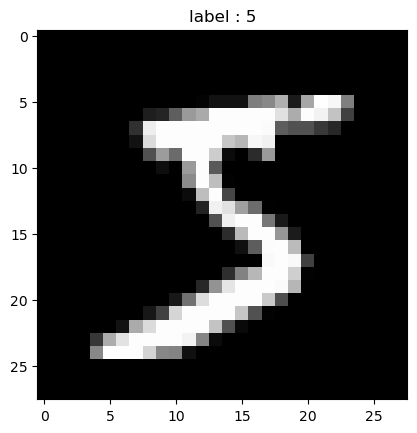

In [44]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [46]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore')
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_one_hot = enc.transform(y_test[:, np.newaxis]).toarray()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(48000, 784)
(10000, 784)


In [47]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

<b>Model structure</b>

In [63]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(n_input,)))  
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,360 (177.19 KB)

 Trainable params: 45,360 (177.19 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['accuracy'])

In [68]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7209 - loss: 0.9921 - val_accuracy: 0.9042 - val_loss: 0.3504
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9108 - loss: 0.3168 - val_accuracy: 0.9163 - val_loss: 0.2974
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9245 - loss: 0.2658 - val_accuracy: 0.9259 - val_loss: 0.2674
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9304 - loss: 0.2432 - val_accuracy: 0.9303 - val_loss: 0.2487
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9342 - loss: 0.2268 - val_accuracy: 0.9345 - val_loss: 0.2330
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9388 - loss: 0.2087 - val_accuracy: 0.9378 - val_loss: 0.2215
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9448 - loss: 0.1936 - val_accuracy: 0.9416 - val_loss: 0.2121
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9462 - loss: 0.1866 - 

In [69]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.16344642639160156
Train accuracy: 0.953416645526886
Test loss: 0.17122916877269745
Test accuracy: 0.9516000151634216


[Problem 7] (Advance assignment) Rewriting to PyTorch

In [70]:
df = pd.read_csv("import/iris.csv")

#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [71]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [72]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [75]:
import torch
import torch.nn as nn

In [76]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [77]:
class Loader:

    def __init__(self, x, y, shuffle=True, batch_size=16):
        
        self.X = x
        self.y = y.astype("float32")

        self.shuffle = shuffle
        self.batch_size = batch_size
        self.n_conts = self.X.shape[1]
        self.len = self.X.shape[0]
        n_batches, remainder = divmod(self.len, self.batch_size)

        if remainder > 0:
            n_batches += 1
        self.n_batches = n_batches
        self.remainder = remainder  # for debugging

        self.idxes = np.array([i for i in range(self.len)])

    def __iter__(self):
        self.i = 0
        if self.shuffle:
            ridxes = self.idxes
            np.random.shuffle(ridxes)
            self.X = self.X[ridxes]
            if self.y is not None:
                self.y = self.y[ridxes]

        return self

    def __next__(self):
        if self.i >= self.len:
            raise StopIteration

        X = torch.FloatTensor(self.X[self.i:self.i + self.batch_size, :])
    
        if self.y is not None:
       
            y = torch.FloatTensor(self.y[self.i:self.i + self.batch_size])
     
        else:
            y = None


        batch = (X, y) 
        self.i += self.batch_size
        return batch

    def __len__(self):
        return self.n_batches

In [78]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [79]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(hidden_size2, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.out(out)
        return out

In [80]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)

In [81]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/4], Loss: 0.5357
Epoch [1/20], Step [4/4], Loss: 0.4731
Epoch [2/20], Step [2/4], Loss: 0.3265
Epoch [2/20], Step [4/4], Loss: 0.1697
Epoch [3/20], Step [2/4], Loss: 0.1220
Epoch [3/20], Step [4/4], Loss: 0.0639
Epoch [4/20], Step [2/4], Loss: 0.0724
Epoch [4/20], Step [4/4], Loss: 0.0658
Epoch [5/20], Step [2/4], Loss: 0.0700
Epoch [5/20], Step [4/4], Loss: 0.0630
Epoch [6/20], Step [2/4], Loss: 0.0124
Epoch [6/20], Step [4/4], Loss: 0.0057
Epoch [7/20], Step [2/4], Loss: 0.0234
Epoch [7/20], Step [4/4], Loss: 0.0041
Epoch [8/20], Step [2/4], Loss: 0.0104
Epoch [8/20], Step [4/4], Loss: 0.0011
Epoch [9/20], Step [2/4], Loss: 0.0055
Epoch [9/20], Step [4/4], Loss: 0.0064
Epoch [10/20], Step [2/4], Loss: 0.0023
Epoch [10/20], Step [4/4], Loss: 0.0000
Epoch [11/20], Step [2/4], Loss: 0.0000
Epoch [11/20], Step [4/4], Loss: 0.0001
Epoch [12/20], Step [2/4], Loss: 0.0002
Epoch [12/20], Step [4/4], Loss: 0.0027
Epoch [13/20], Step [2/4], Loss: 0.0019
Epoch [13/20], Ste

In [82]:
y_true = []
preds = []
for i, (x, y) in enumerate(val_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())

In [83]:
preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

1.0

In [85]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.9

Multi classification: Iris Dataset on Pytorch

In [87]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("import/iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [88]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [89]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [90]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)
model

NeuralNet(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=100, out_features=3, bias=True)
)

In [91]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [92]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y.long())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/6], Loss: 0.8448
Epoch [1/20], Step [4/6], Loss: 0.5308
Epoch [1/20], Step [6/6], Loss: 0.5554
Epoch [2/20], Step [2/6], Loss: 0.4433
Epoch [2/20], Step [4/6], Loss: 0.6853
Epoch [2/20], Step [6/6], Loss: 0.2294
Epoch [3/20], Step [2/6], Loss: 0.2143
Epoch [3/20], Step [4/6], Loss: 0.1269
Epoch [3/20], Step [6/6], Loss: 0.4954
Epoch [4/20], Step [2/6], Loss: 0.1589
Epoch [4/20], Step [4/6], Loss: 0.2002
Epoch [4/20], Step [6/6], Loss: 0.1787
Epoch [5/20], Step [2/6], Loss: 0.1315
Epoch [5/20], Step [4/6], Loss: 0.0444
Epoch [5/20], Step [6/6], Loss: 0.1140
Epoch [6/20], Step [2/6], Loss: 0.1004
Epoch [6/20], Step [4/6], Loss: 0.0580
Epoch [6/20], Step [6/6], Loss: 0.1000
Epoch [7/20], Step [2/6], Loss: 0.0203
Epoch [7/20], Step [4/6], Loss: 0.0212
Epoch [7/20], Step [6/6], Loss: 0.0279
Epoch [8/20], Step [2/6], Loss: 0.0200
Epoch [8/20], Step [4/6], Loss: 0.2237
Epoch [8/20], Step [6/6], Loss: 0.0845
Epoch [9/20], Step [2/6], Loss: 0.0650
Epoch [9/20], Step [4/6],

In [93]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    _, predicted = torch.max(logit.data, 1)
    preds.append(predicted)

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.8